In [1]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print('numpy version : ', np.__version__)
print('pandas version : ', np.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

numpy version :  1.19.2
pandas version :  1.19.2


### pie chart : 카테고리의 상대적인 비교

plt.figure()

plt.pie()

plt.show()
plt.close()

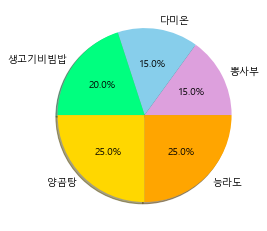

In [11]:
# basic
labels = ['뽕사부', '다미온', '생고기비빔밥', '양곰탕', '능라도']
datas  = [15, 15, 20, 25, 25]
colors = ['plum', 'skyblue', 'springgreen', 'gold', 'orange']

plt.figure()

plt.pie(datas, labels = labels, colors = colors, shadow = True,
       autopct='%1.1f%%')

plt.show()
plt.close()

In [18]:
# 1. auto-mpg 실습 (pie)
dataset = pd.read_csv('C:/DATA_WORKS/PYTHON_WORKS/multicampus/data/auto-mpg.csv', header=None)
dataset.columns = ['mpg', 'cyl', 'disp', 'horsepower', 'weight', 'acc', 'year', 'origin', 'name']
dataset['cnt'] = 1
dataset

,mpg,cyl,disp,horsepower,weight,acc,year,origin,name,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,1


In [21]:
# 지역으로 grouping 및 summary 확인
display(dataset.groupby('origin').groups)
display(dataset.groupby('origin').sum())

{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 80, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 109, 112, 113, 115, 116, 121, 124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, ...], 2: [19, 20, 21, 22, 23, 50, 51, 52, 55, 59, 76, 77, 78, 79, 102, 114, 117, 118, 119, 120, 122, 141, 142, 143, 147, 148, 151, 172, 175, 177, 178, 179, 180, 182, 183, 186, 197, 203, 207, 209, 211, 218, 233, 240, 242, 244, 274, 275, 276, 277, 278, 293, 297, 299, 304, 309, 317, 325, 326, 327, 328, 330, 332, 335, 353, 354, 359, 360, 375, 394], 3: [14, 18, 29, 31, 53, 54, 57, 71, 81, 82, 84, 108, 110, 111, 123, 129, 131, 144, 145, 149, 150, 167, 171, 173, 181, 198, 204, 205, 210, 216, 220, 235, 239, 241, 243, 246, 247, 248, 267, 268, 270, 273, 279, 294, 303, 310, 312, 318, 

,mpg,cyl,disp,weight,acc,year,cnt
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [24]:
# index 라벨 변경
print('제조국으로 그룹을 지어 라벨 인덱스 변경 -')
origin_grp_frm = dataset.groupby('origin').sum()
origin_grp_frm.index = ['USA', 'EU', 'KOR']
origin_grp_frm

제조국으로 그룹을 지어 라벨 인덱스 변경 -


,mpg,cyl,disp,weight,acc,year,cnt
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
KOR,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [28]:
print('실린더로 그룹을 지어서 라벨 인덱스 변경 - ')
cyl_grp_frm = dataset.groupby('cyl').sum()
cyl_grp_frm.index = ['cyl3', 'cyl4', 'cyl5', 'cyl6', 'cyl8']
cyl_grp_frm

실린더로 그룹을 지어서 라벨 인덱스 변경 - 


,mpg,disp,weight,acc,year,origin,cnt
cyl3,82.2,290.0,9594.0,53.0,302,12,4
cyl4,5974.5,22398.5,470858.0,3386.7,15723,405,204
cyl5,82.1,435.0,9310.0,55.9,237,6,3
cyl6,1678.8,18324.0,268651.0,1366.1,6378,100,84
cyl8,1541.2,35536.0,423816.0,1334.4,7612,103,103


제조국별 생산량(cnt) pie chart


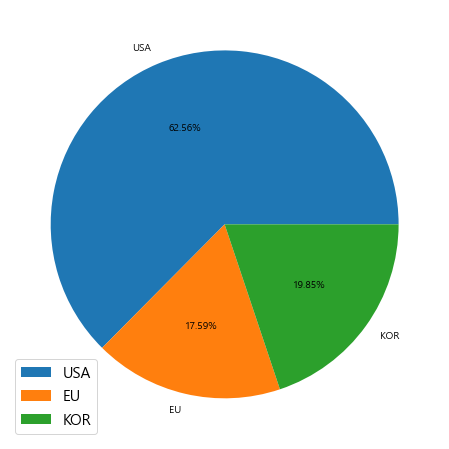

In [64]:
# pie chart
print('제조국별 생산량(cnt) pie chart')
plt.figure(figsize=(12, 8))

plt.pie(origin_grp_frm['cnt'], labels = origin_grp_frm['cnt'].index, autopct='%1.2f%%')
plt.legend(labels=origin_grp_frm.index, loc='best', fontsize='15')

plt.show()
plt.close()

제조국과 실린더별 파이 구현
subplot 이용한 시각화


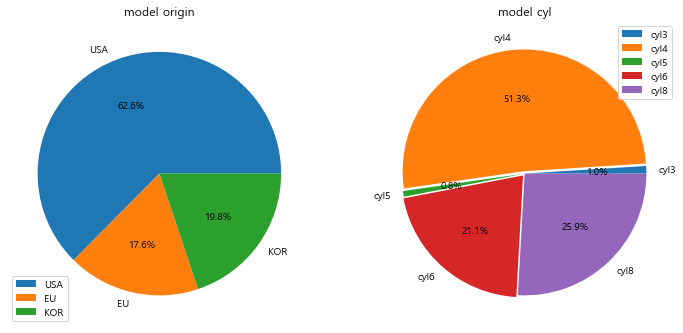

In [77]:
print('제조국과 실린더별 파이 구현')
print('subplot 이용한 시각화')
fig = plt.figure(figsize = (12, 10))
ax01 = fig.add_subplot(1, 2, 1)
ax02 = fig.add_subplot(1, 2, 2)

plt.title('제조국과 실린더별 생산 모델')

ax01.pie(origin_grp_frm['cnt'], labels = origin_grp_frm.index, autopct='%1.1f%%')

ax01.set_title('model origin')
ax01.legend(labels = origin_grp_frm.index, loc = 'best')

ax02.pie(cyl_grp_frm['cnt'], labels = cyl_grp_frm.index, autopct='%1.1f%%', 
         startangle = 0, counterclock = True, explode=[0, 0.02, 0.01, 0.02, 0])
ax02.set_title('model cyl')
ax02.legend(labels = cyl_grp_frm.index, loc = 'best')

plt.show()
plt.close()

### histogram : 구간에 대한 데이터 집계
- 변수가 하나인 단변수 데이터의 빈도수를 시각화

type -  <class 'numpy.ndarray'>


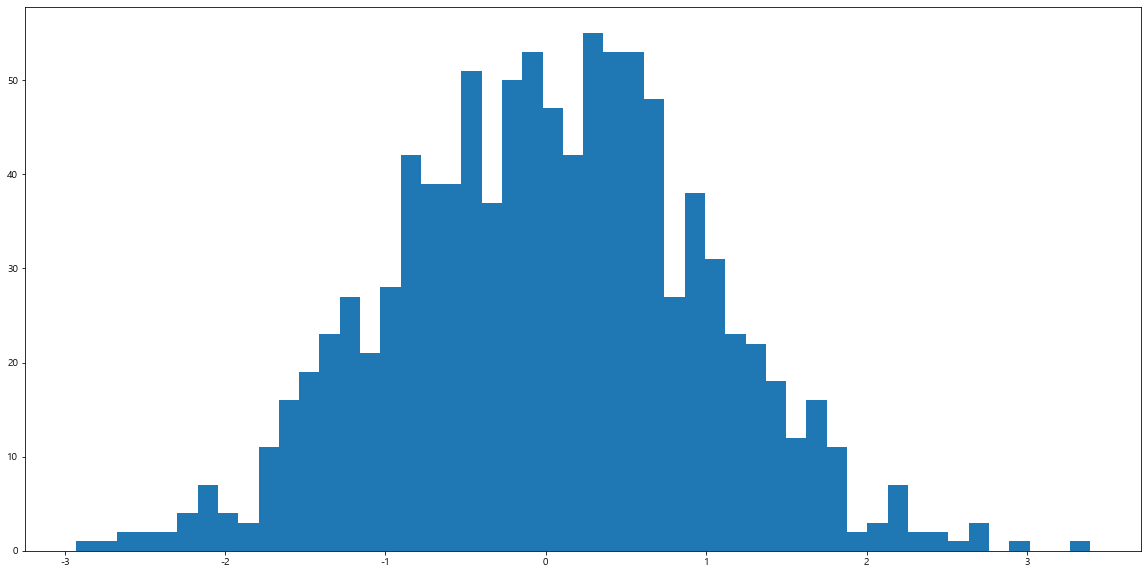

In [84]:
datas = np.random.randn(1000)
print('type - ', type(datas))

plt.figure(figsize = (20,10))

plt.hist(datas, bins = 50)

plt.show()
plt.close()

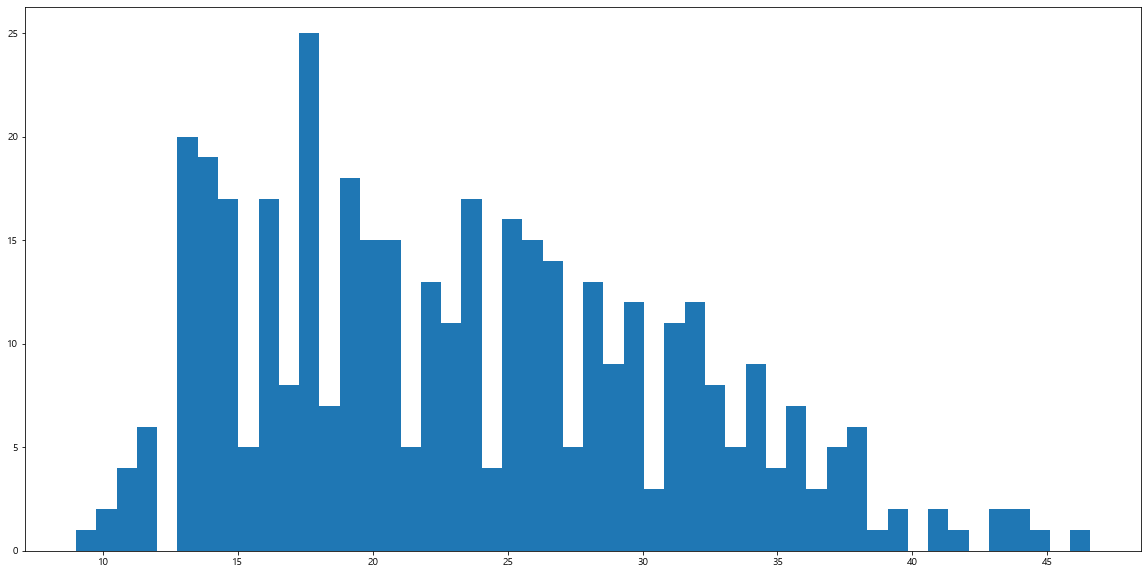

In [86]:
# 2. auto-mpg 실습 (histogram)
plt.figure(figsize = (20,10))

plt.hist(dataset['mpg'], bins = 50) # bins -> 막대 너비

plt.show()
plt.close()

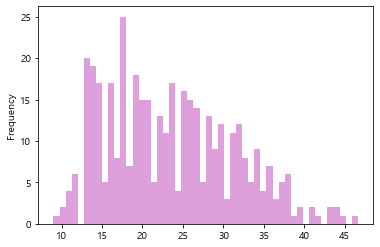

In [87]:
dataset['mpg'].plot(kind='hist', bins=50, color='plum')
plt.show()
plt.close()

### koweps_visualization 실습

In [95]:
koweps_dataset = pd.read_excel('C:/DATA_WORKS/PYTHON_WORKS/multicampus/data/koweps_visualization.xlsx')
koweps_dataset

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


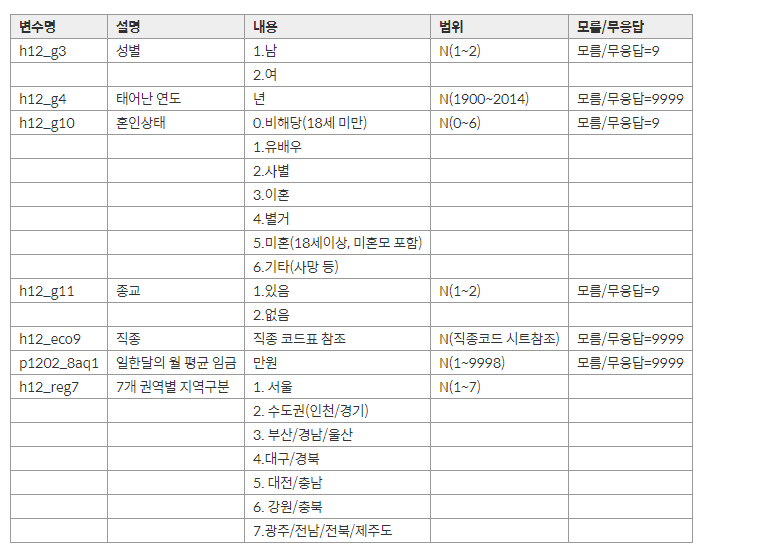

In [92]:
from IPython.display import Image
Image('C:/DATA_WORKS/PYTHON_WORKS/multicampus/ml_img/koweps_img.png', width = 700)

In [97]:
# dataset이 클 경우 copy해두고 사용
koweps = koweps_dataset.copy()
koweps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [99]:
koweps_frm = koweps[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
koweps_frm.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한 달의 월 평균 임금', '7개 권역별 지역구분']
display(koweps_frm)
koweps_frm.info()

,성별,태어난 연도,혼인상태,종교,직종,일한 달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   성별             15422 non-null  int64  
 1   태어난 연도         15422 non-null  int64  
 2   혼인상태           15422 non-null  int64  
 3   종교             15422 non-null  int64  
 4   직종             7131 non-null   float64
 5   일한 달의 월 평균 임금  4507 non-null   float64
 6   7개 권역별 지역구분    15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


In [119]:
print('조사 대상자들에 대한 성별 분포를 막대그래프로 시각화하기')
print('case01 - ')
print()
koweps_frm['성별2'] = koweps_frm['성별'].apply(lambda x : '남자' if x==1 else '여자')
display(koweps_frm)

print('case02 - ')
koweps_frm['성별2'] = np.where(koweps_frm.filter(['성별']) == 1, '남자', '여자')
display(koweps_frm)

조사 대상자들에 대한 성별 분포를 막대그래프로 시각화하기
case01 - 



,성별,태어난 연도,혼인상태,종교,직종,일한 달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,여자
1,2,1945,2,2,NaN,NaN,1,여자
2,1,1948,2,2,NaN,NaN,1,남자
3,1,1942,3,1,762.0,108.9,1,남자
4,2,1923,2,1,NaN,NaN,1,여자
...,...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5,여자
15418,2,1992,5,1,NaN,NaN,5,여자
15419,1,1995,5,1,521.0,72.0,5,남자
15420,2,1998,5,1,432.0,NaN,5,여자


case02 - 


,성별,태어난 연도,혼인상태,종교,직종,일한 달의 월 평균 임금,7개 권역별 지역구분,성별2
0,2,1936,2,2,NaN,NaN,1,여자
1,2,1945,2,2,NaN,NaN,1,여자
2,1,1948,2,2,NaN,NaN,1,남자
3,1,1942,3,1,762.0,108.9,1,남자
4,2,1923,2,1,NaN,NaN,1,여자
...,...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5,여자
15418,2,1992,5,1,NaN,NaN,5,여자
15419,1,1995,5,1,521.0,72.0,5,남자
15420,2,1998,5,1,432.0,NaN,5,여자


In [120]:
print('결측값 확인 - ')
koweps_frm.isna().sum()

결측값 확인 - 


성별                   0
태어난 연도               0
혼인상태                 0
종교                   0
직종                8291
일한 달의 월 평균 임금    10915
7개 권역별 지역구분          0
성별2                  0
dtype: int64

In [142]:
print('성별의 빈도 확인 - ')
koweps_frm['성별2'].value_counts()

# 데이터프레임에 저장
gender_frm = pd.DataFrame(koweps_frm['성별2'].value_counts())
gender_frm.rename(columns = {'성별2' : '명'}, inplace=True)
gender_frm

성별의 빈도 확인 - 


,명
여자,8440
남자,6982


성별 분포에 따른 시각화 - 



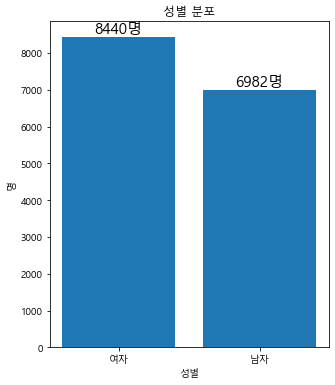

In [154]:
print('성별 분포에 따른 시각화 - ')
print()

# plt 이용
plt.figure(figsize = (5,6))

plt.title('성별 분포')
plt.bar(gender_frm.index, gender_frm['명'])
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list(gender_frm['명'])) :
    txt = '%d명' %value
    plt.text(idx, value, txt,
            horizontalalignment = 'center', fontsize=15, verticalalignment = 'bottom')

plt.show()
plt.close()

# plot 이용
# gender_frm.plot(kind='bar', rot=0)
# plt.grid()
# plt.title('성별 분포')
# plt.xlabel('성별')
# plt.ylabel('명')

성별 분포 pie chart


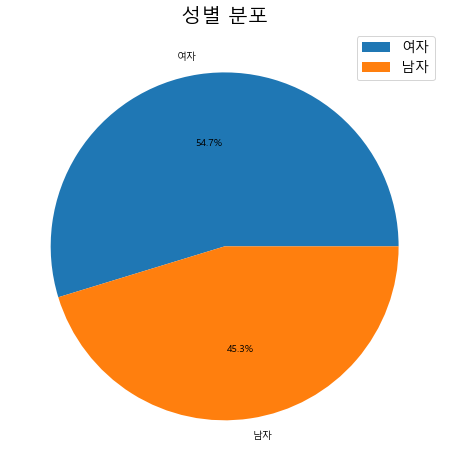

In [168]:
# pie chart
print('성별 분포 pie chart')
plt.figure(figsize=(12, 8))

plt.title('성별 분포', fontsize='20')
plt.pie(gender_frm['명'], labels = gender_frm['명'].index, autopct='%1.1f%%')
plt.legend(labels=gender_frm.index, loc='best', fontsize='14')

plt.show()
plt.close()

In [1]:
gender_frm['명']

NameError: name 'gender_frm' is not defined

## 실습
### 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별을 남자와 여자로 변환
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(성별로 그룹화하여 그룹별 평균)
- 데이터 시각화


### 나이에 따른 평균 급여 변화
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화

### 연령대에 따른 분포

### 연령대별 평균 급여 변화

### 성별과 연령대 분포 

### 성별과 연령대에 따른 평균 급여 변화

### 지역별 연령층 분포와 연령층별 지역비율